Iris Flower Classification Project
🎯 Goal:
Predict the type of iris flower (Setosa, Versicolor, or Virginica) using its features:
Sepal Length
Sepal Width
Petal Length
Petal Width

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# Step 2: Load dataset

In [6]:
iris = load_iris()


# Step 3: Create DataFrame

In [7]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target


In [8]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


# Step 4: Split data

In [13]:
X = df.iloc[:, :-1] #features
y = df['species']   #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 120, Testing samples: 30


Train the Model (Logistic Regression)

In [14]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [16]:
y_pred = model.predict(X_test)

#Evaluate the Model

In [17]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#Decision Tree Classifier (Iris Dataset)

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

#Load and Prepare the Data


In [19]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

X = df.iloc[:, :-1]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Train a Decision Tree Model  


In [20]:
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
y_pred = model.predict(X_test)

#Evaluate the Model

In [22]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#Visualize the Decision Tree

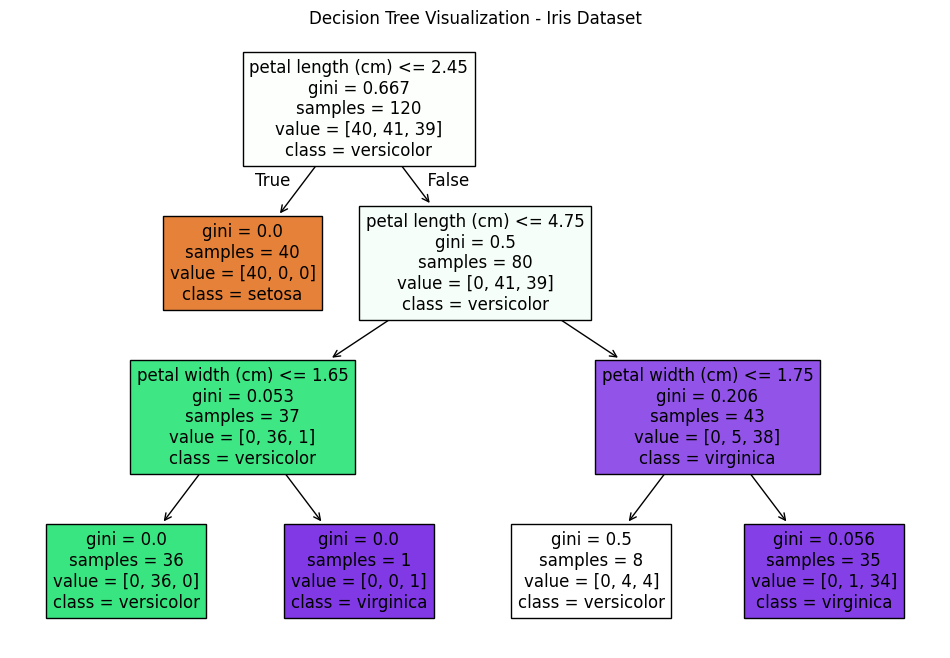

In [23]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization - Iris Dataset")
plt.show()


#Feature Importance

In [24]:
for name, importance in zip(iris.feature_names, model.feature_importances_):
    print(f"{name}: {importance:.3f}")


sepal length (cm): 0.000
sepal width (cm): 0.000
petal length (cm): 0.935
petal width (cm): 0.065


#Random Forest Classifier (Iris Dataset)

In [25]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


#Load and Prepare Data

In [26]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

X = df.iloc[:, :-1]
y = df['species']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Random Forest Model

In [27]:
rf_model = RandomForestClassifier(
    n_estimators=100,      # number of trees
    random_state=42,
    max_depth=4,           # prevent overfitting
)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

#Evaluate Model Performance

In [28]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#Visualize Confusion Matrix

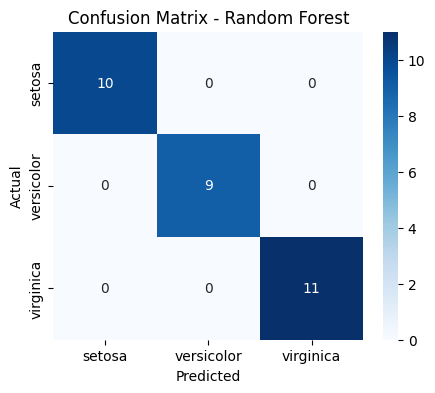

In [29]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

#Feature Importance

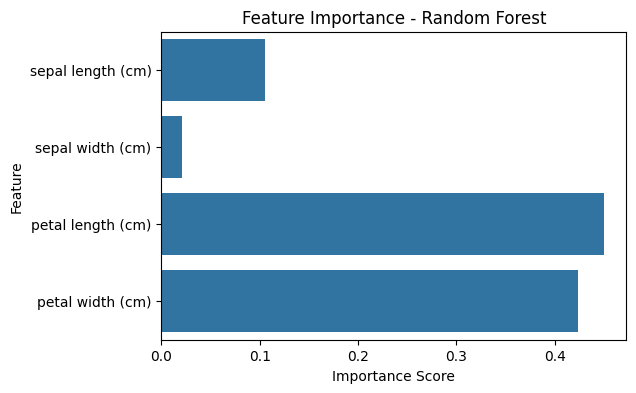

In [30]:
importances = rf_model.feature_importances_
features = iris.feature_names

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()